In [96]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy
import pandas as pd

In [97]:
def create_binary(frame):
    # convert to gray
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # apply blur
    frame = cv2.GaussianBlur(frame, (3,3), 0)

    # convert to binary
    frame = cv2.threshold(frame, 210, 255, cv2.THRESH_BINARY)[1]

    return frame

In [98]:
labels = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
names = []
for i in range(len(labels)):
    names.append(create_binary(cv2.imread('names/' + labels[i] + '.png')))


In [99]:
def get_number_black_pixels(img):
    return np.sum(img == 0)

In [100]:
def get_images_similarity_ratio(img1, img2):
    img1_h, img1_w = img1.shape
    img2_h, img2_w = img2.shape
    total_pixels_img1 = img1_h * img1_w
    total_pixels_img2 = img2_h * img2_w
    total_pixels = max(total_pixels_img1, total_pixels_img2)

    subtracted = cv2.subtract(img1, img2)
    subtracted = cv2.threshold(subtracted, 210, 255, cv2.THRESH_BINARY)[1]

    number_black_pixels = get_number_black_pixels(subtracted)

    return number_black_pixels / total_pixels

In [101]:
matrix = [[] for _ in range(13)]

i = 0
for img1 in names:
    img1_h, img1_w = img1.shape
    for img2 in names:
        resized_img = cv2.resize(img2, (img1_w, img1_h))
        similarity = get_images_similarity_ratio(resized_img, img1)
        matrix[i].append(round(similarity, 4))
    i += 1

original_matrix = copy.deepcopy(matrix)

for line in matrix:
    line.sort()

df = pd.DataFrame(original_matrix, labels, labels)
display(df)


,2,3,4,5,6,7,8,9,10,J,Q,K,A
2,1.0000,0.8336,0.6979,0.7878,0.8212,0.7422,0.8411,0.8737,0.7572,0.7629,0.7997,0.6938,0.7076
3,0.8498,1.0000,0.7439,0.9067,0.9242,0.7396,0.9906,0.9189,0.7974,0.8353,0.8350,0.7030,0.7086
4,0.7420,0.7747,1.0000,0.7823,0.8192,0.7036,0.8407,0.7813,0.8415,0.7389,0.7446,0.8052,0.8156
5,0.7576,0.8594,0.7087,1.0000,0.9253,0.6798,0.9096,0.8665,0.7413,0.7669,0.7876,0.7059,0.6877
6,0.7525,0.8384,0.7091,0.8896,1.0000,0.6365,0.9244,0.8556,0.7141,0.7364,0.8174,0.7019,0.6565
7,0.8518,0.8347,0.7701,0.8260,0.8181,1.0000,0.8332,0.8217,0.7548,0.7505,0.7752,0.7790,0.7500
8,0.7631,0.8944,0.7198,0.8623,0.9137,0.6424,1.0000,0.8650,0.7176,0.7390,0.7849,0.6861,0.6640
9,0.8079,0.8358,0.6719,0.8317,0.8586,0.6438,0.8788,1.0000,0.7377,0.7539,0.8208,0.6845,0.6542
10,0.7510,0.7765,0.7812,0.7679,0.7799,0.6389,0.7956,0.8022,1.0000,0.7979,0.7654,0.7173,0.7181
J,0.8473,0.8990,0.7724,0.8873,0.8904,0.7166,0.9029,0.9060,0.8827,1.0000,0.8479,0.7309,0.7231


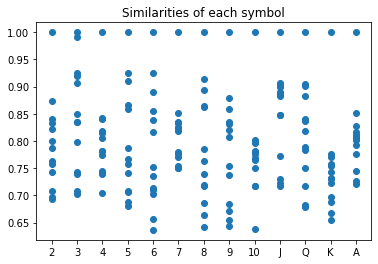

In [102]:
points = []

i = 1
for line in matrix:
    for point in line:
        points.append((i, point))
    i += 1

plt.scatter(*zip(*points))
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13], ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A'])
plt.title('Similarities of each symbol')
plt.savefig('graphs/similarity.png')
plt.show()


In [103]:
steps = [[] for _ in range(13)]

for j in range(len(matrix)):
    for i in range(len(line) - 1):
        steps[j].append(round(matrix[j][i+1] - matrix[j][i], 4))
    #steps[j].sort()

for i in range(13):
    print(labels[i], steps[i])

2 [0.0041, 0.0097, 0.0346, 0.015, 0.0057, 0.0249, 0.0119, 0.0215, 0.0124, 0.0075, 0.0326, 0.1263]
3 [0.0056, 0.031, 0.0043, 0.0535, 0.0376, 0.0003, 0.0145, 0.0569, 0.0122, 0.0053, 0.0664, 0.0094]
4 [0.0353, 0.0031, 0.0026, 0.0301, 0.0066, 0.001, 0.0229, 0.0104, 0.0036, 0.0215, 0.0008, 0.1585]
5 [0.0079, 0.0182, 0.0028, 0.0326, 0.0163, 0.0093, 0.0207, 0.0718, 0.0071, 0.0431, 0.0157, 0.0747]
6 [0.02, 0.0454, 0.0072, 0.005, 0.0223, 0.0161, 0.0649, 0.021, 0.0172, 0.034, 0.0348, 0.0756]
7 [0.0005, 0.0043, 0.0153, 0.0051, 0.0038, 0.0391, 0.0036, 0.0043, 0.0072, 0.0015, 0.0171, 0.1482]
8 [0.0216, 0.0221, 0.0315, 0.0022, 0.0192, 0.0241, 0.0218, 0.0774, 0.0027, 0.0294, 0.0193, 0.0863]
9 [0.0104, 0.0177, 0.0126, 0.0532, 0.0162, 0.054, 0.0129, 0.0109, 0.0041, 0.0228, 0.0202, 0.1212]
10 [0.0784, 0.0008, 0.0329, 0.0144, 0.0025, 0.0086, 0.0034, 0.0013, 0.0144, 0.0023, 0.0043, 0.1978]
J [0.0065, 0.0078, 0.0415, 0.0749, 0.0006, 0.0348, 0.0046, 0.0031, 0.0086, 0.0039, 0.0031, 0.094]
Q [0.0048, 0.034, 0

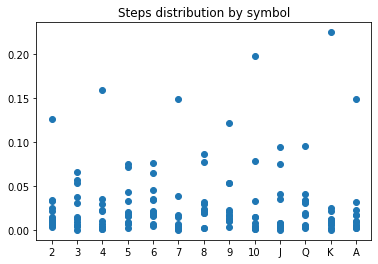

In [104]:
points = []

i = 1
for line in steps:
    for point in line:
        points.append((i, point))
    i += 1

plt.scatter(*zip(*points))
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13], ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A'])
plt.title('Steps distribution by symbol')
plt.savefig('graphs/steps.png')
plt.show()

In [105]:
data = []

for i in range(13):
    line = []
    line.append(matrix[i][0])
    line.append(matrix[i][11])
    line.append(matrix[i][11] - matrix[i][0])
    line.append(min(steps[i]))
    line.append(sum(steps[i]) / len(steps[i]))
    line.append(np.std(steps[i]))
    data.append(line)

df = pd.DataFrame(data, labels, ['Min', 'Max', 'Range', 'Min Step', 'Aver Step', 'Std Dev Step'])
display(df)

,Min,Max,Range,Min Step,Aver Step,Std Dev Step
2,0.6938,0.8737,0.1799,0.0041,0.025517,0.031886
3,0.7030,0.9906,0.2876,0.0003,0.024750,0.022469
4,0.7036,0.8415,0.1379,0.0008,0.024700,0.041955
5,0.6798,0.9253,0.2455,0.0028,0.026683,0.023436
6,0.6365,0.9244,0.2879,0.0050,0.030292,0.021045
7,0.7500,0.8518,0.1018,0.0005,0.020833,0.039744
8,0.6424,0.9137,0.2713,0.0022,0.029800,0.024838
9,0.6438,0.8788,0.2350,0.0041,0.029683,0.031537
10,0.6389,0.8022,0.1633,0.0008,0.030092,0.054788
J,0.7166,0.9060,0.1894,0.0006,0.023617,0.030165
